# Week 2: Neuron and Perceptron

## The neuron

![The neuron](images/neuron.png)

## The perceptron

![The perceptron](images/perceptron.png)

## Import libraries

- `random` is used to generate random numbers to pick random rows to train the perceptron
- `matplotlib` is used for plotting

In [26]:
import random
import matplotlib.pyplot as plot

## Define variables

- `rows`, the dataset of the OR function (false=0, true=1)
- `learning_rate`, the total change made while learning. The usage of it is described [here](https://en.wikipedia.org/wiki/Delta_rule)
- `epochs`, the maximum number of training iterations
- `activation`, the activation function, here the step function
- `all_weights`, the list of all weights ever starting with "random" weights

In [27]:
rows = [ 
    { 'x0': 1, 'x1': 0, 'x2': 0, 'target': 0 },
    { 'x0': 1, 'x1': 0, 'x2': 1, 'target': 1 },
    { 'x0': 1, 'x1': 1, 'x2': 0, 'target': 1 },
    { 'x0': 1, 'x1': 1, 'x2': 1, 'target': 1 },
]
learning_rate = 0.15
epochs = range(100)
activation = lambda s: 1 if s >= 0 else 0
all_weights = [ { 'w0': -1, 'w1': 0, 'w2': -1 } ]

## Define the function that computes the output of the perceptron


In [28]:
def compute_output(row, weights):
    z = weights['w0'] * row['x0'] + weights['w1'] * row['x1'] + weights['w2'] * row['x2']
    return activation(z)

## Define the function to plot the weights and the dataset

In [29]:
def figure(iteration, new_weights, previous_weights, all_weights, previous_row):
    # start a new figure
    plot.figure(iteration)
    plot.axis([-3, +4, -3, +4])
    plot.title(f"epoch {iteration:03d}" + (f": {new_weights['w1']:+.2f}*x1{new_weights['w2']:+.2f}*x2{new_weights['w0']:+.2f}=0" if new_weights else ""))

    colors = { 0: 'blue', 1: 'red' }
    if all_weights:
        # plot all weights
        for weights in all_weights:
            old_xs = [-3, +4]
            old_ys = [-(weights['w1'] * x + weights['w0'] * 1) / weights['w2'] for x in old_xs]
            plot.plot(old_xs, old_ys, color='green', alpha=1 if weights == new_weights else 0.2)
            if weights == previous_weights:
                output_above = compute_output({'x0': 1, 'x1': 0.5, 'x2': 100}, weights)
                plot.fill_between(old_xs, old_ys, +4, color=colors[output_above], alpha=0.05)
                plot.fill_between(old_xs, old_ys, -3, color=colors[1 - output_above], alpha=0.05)

    # plot the rows
    for row in rows:
        plot.plot(row['x1'], row['x2'], marker='o', color=colors[row["target"]], markersize=10 if row == previous_row else 5)
    plot.tight_layout()

## Train the perceptron

epoch=000 w0=-1.00 w1=+0.00 w2=-1.00 Wrong=3 x1=0 x2=0 target=0 output=0 error=+0 Ok=True
epoch=001 w0=-1.00 w1=+0.00 w2=-1.00 Wrong=3 x1=1 x2=1 target=1 output=0 error=+1 Ok=False
epoch=002 w0=-0.85 w1=+0.15 w2=-0.85 Wrong=3 x1=0 x2=0 target=0 output=0 error=+0 Ok=True
epoch=003 w0=-0.85 w1=+0.15 w2=-0.85 Wrong=3 x1=0 x2=1 target=1 output=0 error=+1 Ok=False
epoch=004 w0=-0.70 w1=+0.15 w2=-0.70 Wrong=3 x1=1 x2=1 target=1 output=0 error=+1 Ok=False
epoch=005 w0=-0.55 w1=+0.30 w2=-0.55 Wrong=3 x1=0 x2=0 target=0 output=0 error=+0 Ok=True
epoch=006 w0=-0.55 w1=+0.30 w2=-0.55 Wrong=3 x1=0 x2=0 target=0 output=0 error=+0 Ok=True
epoch=007 w0=-0.55 w1=+0.30 w2=-0.55 Wrong=3 x1=0 x2=0 target=0 output=0 error=+0 Ok=True
epoch=008 w0=-0.55 w1=+0.30 w2=-0.55 Wrong=3 x1=1 x2=0 target=1 output=0 error=+1 Ok=False
epoch=009 w0=-0.40 w1=+0.45 w2=-0.55 Wrong=2 x1=1 x2=0 target=1 output=1 error=+0 Ok=True
epoch=010 w0=-0.40 w1=+0.45 w2=-0.55 Wrong=2 x1=0 x2=1 target=1 output=0 error=+1 Ok=False
epoch

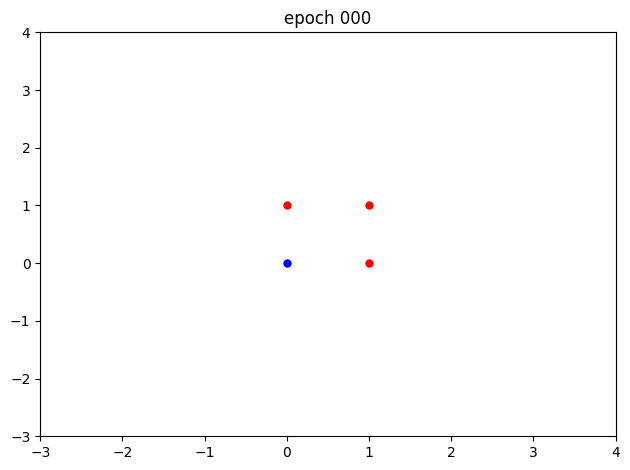

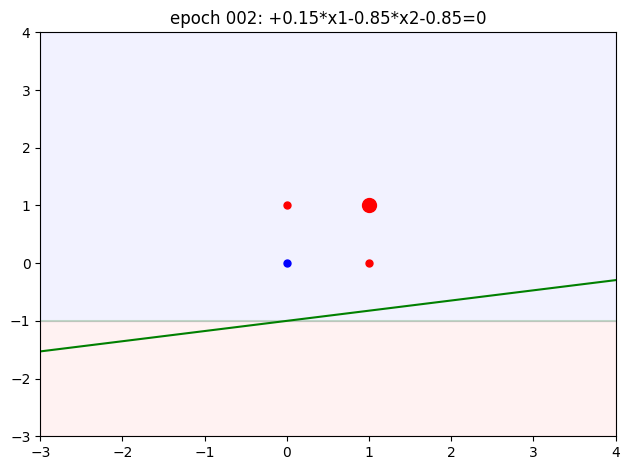

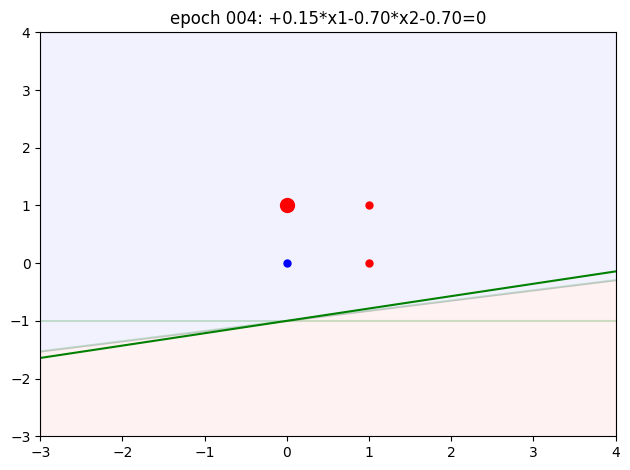

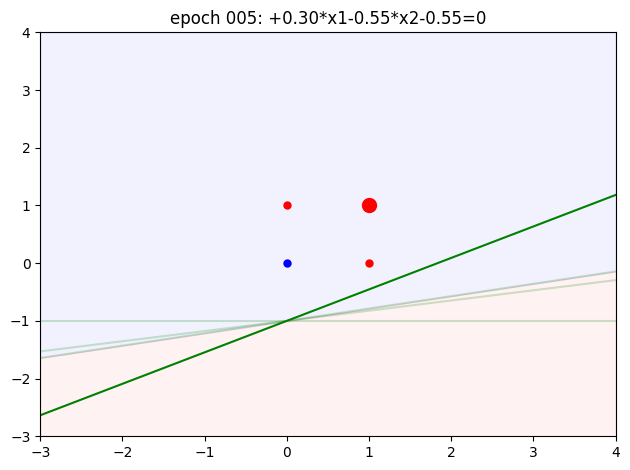

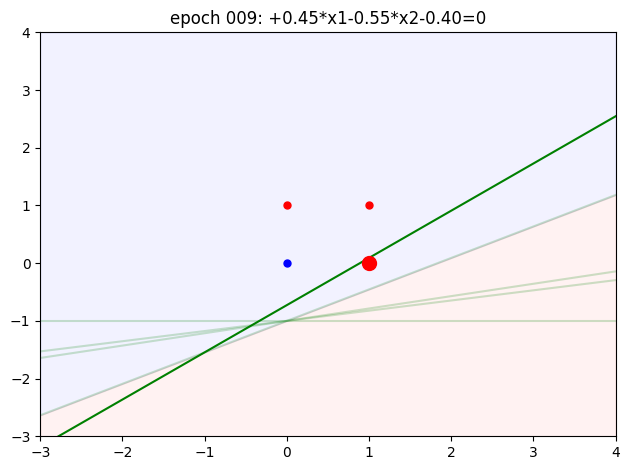

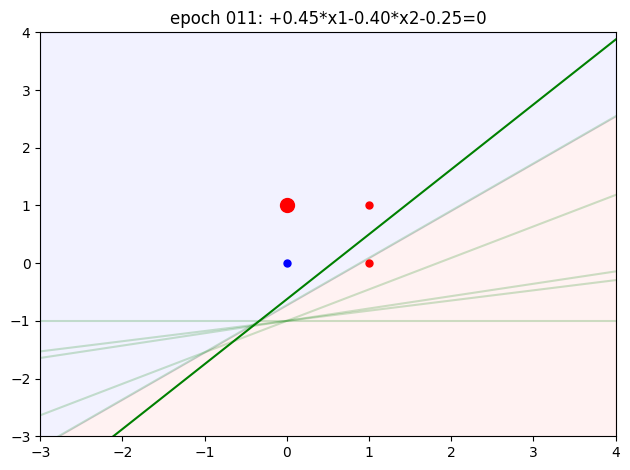

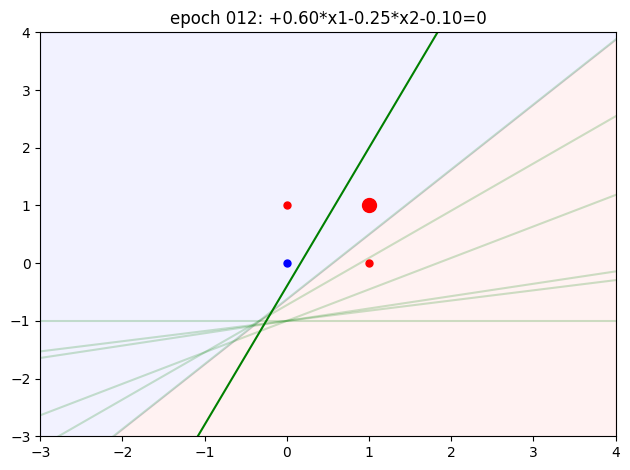

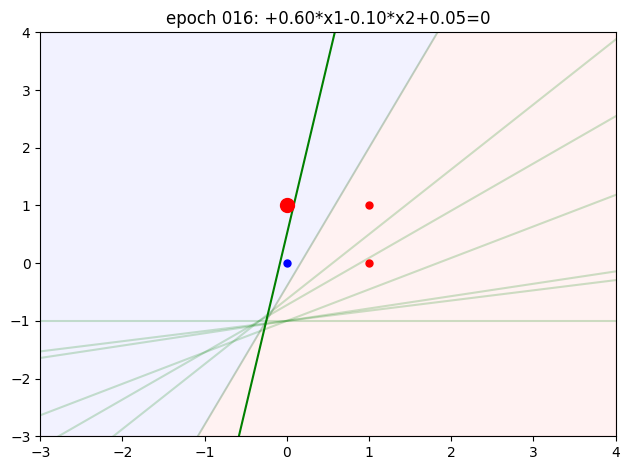

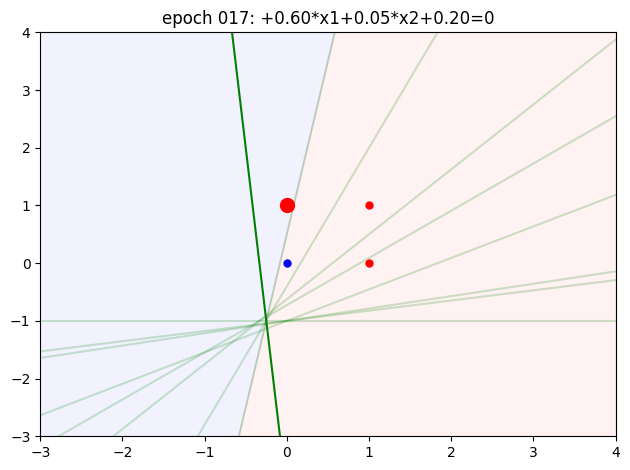

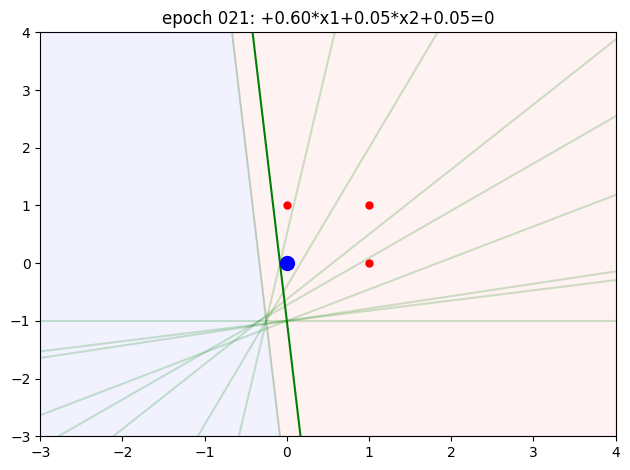

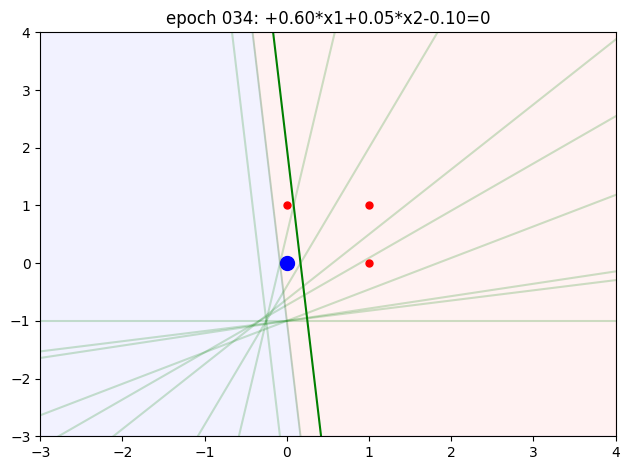

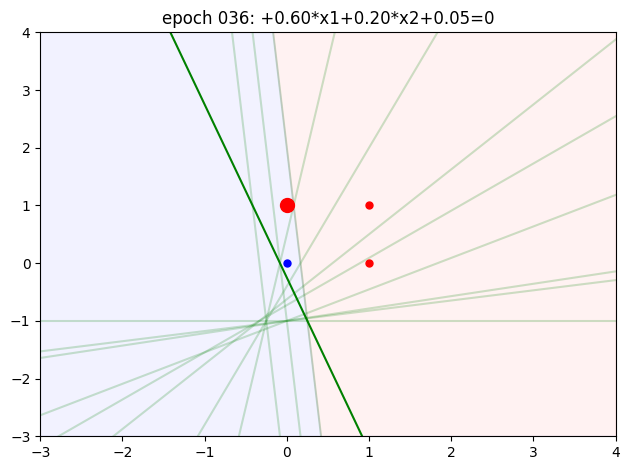

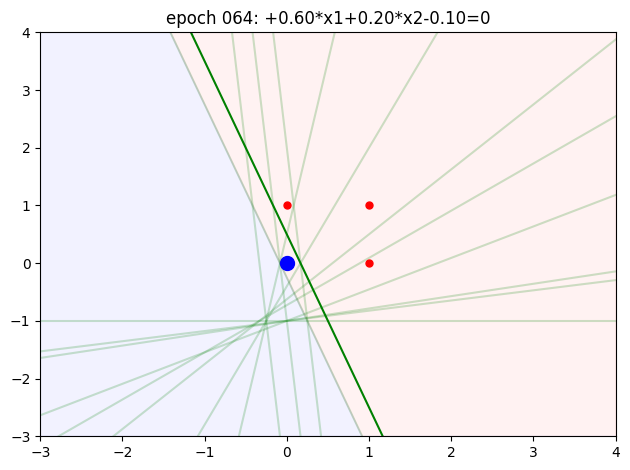

In [30]:
figure(0, None, None, None, None)
for epoch in epochs:
    print(f"epoch={epoch:03d}", end=" ")
    
    weights = all_weights[0]
    print(f"w0={weights['w0']:+.2f} w1={weights['w1']:+.2f} w2={weights['w2']:+.2f}", end=" ")

    # compute the number of wrong outputs
    wrong = sum([row["target"] != compute_output(row, weights) for row in rows])
    print(f"Wrong={wrong}", end=" ")
    if wrong == 0:
        break

    # pick a random row
    row = random.choice(rows)
    output = compute_output(row, weights)
    error = row["target"] - output
    ok = row["target"] == output
    print(f"x1={row['x1']} x2={row['x2']} target={row['target']} output={output} error={error:+1d} Ok={ok}")
    
    # update the weights
    if not ok:
        new_weights = {}
        new_weights['w0'] = weights['w0'] + learning_rate * error * 1
        new_weights['w1'] = weights['w1'] + learning_rate * error * row['x1']
        new_weights['w2'] = weights['w2'] + learning_rate * error * row['x2']
        all_weights.insert(0, new_weights)
        figure(epoch + 1, all_weights[0], all_weights[1], all_weights, row)
